In [5]:
import pandas as pd
data= pd.read_csv(
    "winequalityN.csv",
    names=["type","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"])

threshold = 6  # Define your threshold

data['quality'] = (data['quality'] > threshold).astype(int)
data['type'] = data['type'].apply(lambda x: 0 if x=='white' else 1)
counts = data['quality'].value_counts()
target_count = min(counts)
balanced_data = pd.concat([
    data[data['quality'] == 0].sample(target_count, replace=True),
    data[data['quality'] == 1].sample(target_count, replace=True)
])
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)
balanced_data['quality'].value_counts()
data = balanced_data
features = data.copy()
features.fillna(0, inplace=True)
labels = features.pop('quality')
import numpy as np
features = np.array(features)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.05, random_state=0)

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
#[('ccp_alpha', 0), ('criterion', 'gini'), ('splitter', 'random')]
parameters={'ccp_alpha':(0,1,2),'criterion':('gini','entropy','log_loss'),
            'splitter':('best','random')}

In [6]:
clf = GridSearchCV(DecisionTreeClassifier(), parameters)
import warnings
warnings.filterwarnings("ignore")
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': (0, 1, 2),
                         'criterion': ('gini', 'entropy', 'log_loss'),
                         'splitter': ('best', 'random')})

In [8]:
predictions = clf.predict(X_test)
predictions_train = clf.predict(X_train)

In [9]:
import sklearn
sklearn.metrics.roc_curve(y_test,predictions)

(array([0.        , 0.15151515, 1.        ]),
 array([0.        , 0.93548387, 1.        ]),
 array([inf,  1.,  0.]))

In [10]:
sklearn.metrics.roc_auc_score(y_test,predictions)

0.8919843597262953

In [11]:
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[56, 10],
       [ 4, 58]], dtype=int64)

In [12]:
sklearn.metrics.log_loss(y_test,predictions)

3.9422745894346884

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.890625


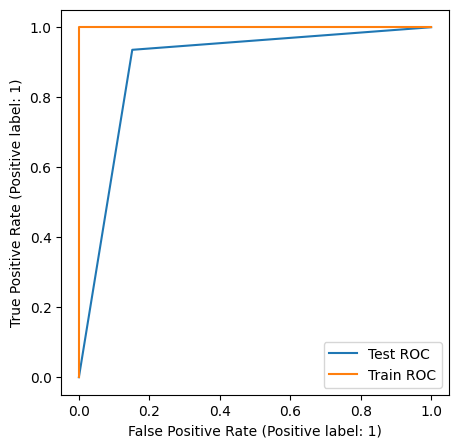

In [15]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
RocCurveDisplay.from_predictions(y_test,predictions, ax=ax, label='Test ROC')
RocCurveDisplay.from_predictions(y_train,predictions_train, ax=ax, label='Train ROC')

In [16]:
sklearn.metrics.f1_score(y_test,predictions,average=None)

array([0.88888889, 0.89230769])